In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [7]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [5]:
emnist_train = EmnistDataset(train=True, sample_to_balance=True)
emnist_val = EmnistDataset(train=False, sample_to_balance=True)

In [14]:
emnist_lines = EmnistLinesDataset(train=False)

2020-08-23 22:01:45.373 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:162 - EmnistLinesDataset loading data from HDF5...


In [15]:
emnist_lines._load_or_generate_data()

2020-08-23 22:01:46.598 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:162 - EmnistLinesDataset loading data from HDF5...


In [16]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapping[i] for i in y])

office in Arkansas after the______
in________________________________
by a oneshot technique____________
office Incumbent__________________
of the revolutionary______________
they______________________________
the scene but_____________________
Knox Ky___________________________
workers wife refused to have______


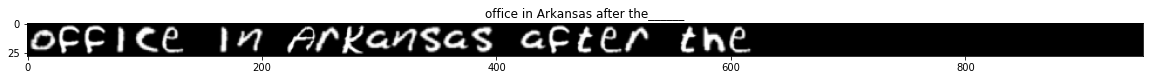

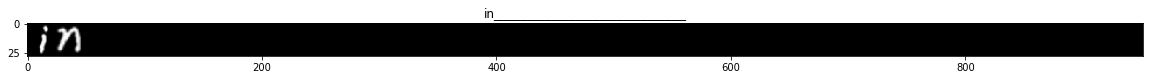

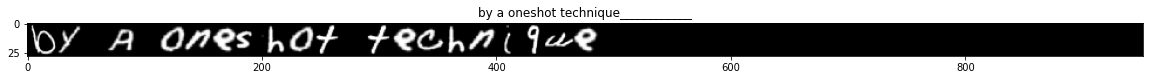

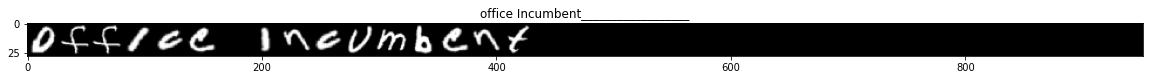

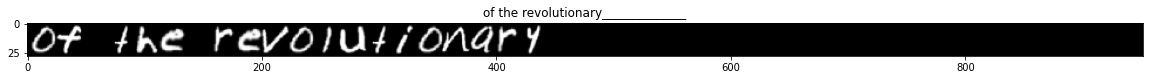

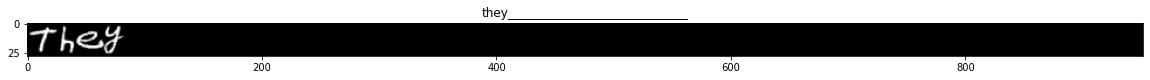

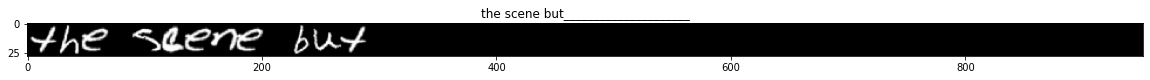

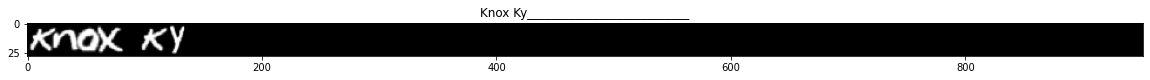

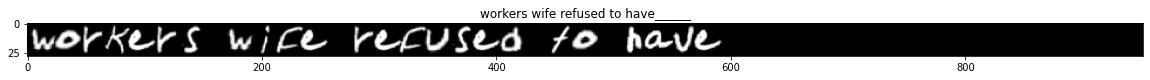

In [17]:


num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')


In [18]:
print(emnist_lines)

EMNIST Lines Dataset
Max length: 34
Min overlap: 0
Max overlap: 0.33
Num classes: 80
Input shape: (28, 952)
Data: (10000, 28, 952)
Tagets: (10000, 34)



In [14]:
dl = EmnistLinesDataLoaders("train")

2020-08-05 00:40:26.070 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:153 - EmnistLinesDataset loading data from HDF5...


In [16]:
ddl = dl("train")

In [17]:
batch = next(iter(ddl))

In [21]:
batch[0][0].shape

torch.Size([1, 28, 952])

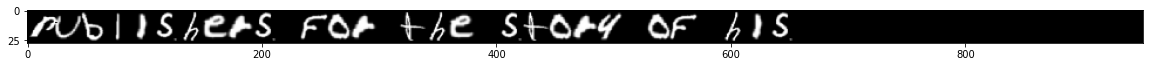

In [24]:
plt.figure(figsize=(20, 20))
plt.imshow(batch[0][-1].squeeze(0), cmap='gray')